In [2]:
import pydicom 
import numpy as np
import matplotlib.pyplot as plt
import scipy
from tqdm import tqdm
import cv2

In [3]:
base = "statement_1"
pass_dicom = 'IM_0003.dcm'
filename = pydicom.data.data_manager.get_files(base, pass_dicom)[0]
print(filename)

statement_1\IM_0003.dcm


In [4]:
videos = {}
plt.set_cmap('gray')

crop = 30
scale = 5

def read_image(path, num=0):
    global videos
    if len(videos) == 0:
        im = pydicom.dcmread(path)
        im = im.pixel_array
        videos[path] = im
    else:
        im = videos[path]
    # if im.ndim == 4:    #  it is a video of frames for ultrasound images (RGB for each pixel)
    #     im = im[num]  # First frame of the video
    # if im.ndim == 3:       # if it is a color image
    #     # im = cv2.cvtColor(im, cv2.COLOR_YCR_CB2RGB)
    #     im = cv2.cvtColor(im, cv2.COLOR_RGB2GRAY)
    r, c = im.shape[1:3]
    if r > c:
        nr, nc = 256, int(c/r*256)
    else:
        nr, nc = int(r/c*256), 256
        
    nf = im.shape[0]
    
    image = np.zeros(shape=(nf, 980, 980))
    for i in range(nf):
        
        img = cv2.cvtColor(im[i], cv2.COLOR_RGB2GRAY)
        img = cv2.resize(img, (nc, nr))
        img = (img - img.min()) / (np.max(img)-np.min(img))
        img = np.uint8(img * 255)
        imag = np.zeros(shape=(256, 256))
        imag[:img.shape[0],:img.shape[1]] = img.copy()
        image[i] = process(imag) 
    # image[:, :im.shape[1],:im.shape[2]] = im.copy()
    # image = image / (np.max(image))
    print(image.shape)
    return image

def process(img):
    img = img[crop:-crop,crop:-crop]
    dim = img.shape
    img = cv2.resize(img, dsize=(int(scale*dim[1]), int(scale*dim[0])))
    return img

def contours(filename):
    text_nme = filename.replace('.dcm', '_inx.txt')
    ctr = np.loadtxt(text_nme)
    ctr = ctr.astype(int)
    ctr = np.array(ctr)
    og_ctr = ctr.copy()
    ctr[:,0] -= crop
    ctr[:,1] -= crop
    ctr = scale * ctr
    
    return ctr

def draw_contour(img, ctr):
    # img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
    cv2.drawContours(img, [ctr], -1, (255, 0, 0), 3)
    plt.imshow(img)
    plt.show()
    

def morphic(img):
    from skimage.morphology import (erosion, dilation, opening, closing,  # noqa
                                white_tophat)
    from skimage.morphology import black_tophat, skeletonize, convex_hull_image  # noqa
    from skimage.morphology import disk  # noqa
    footprint = disk(7)
    
    src = cv2.GaussianBlur(img, (3, 3), 0).astype(np.uint8)

    (thresh, bw_img) = cv2.threshold(src, 65, 255, cv2.THRESH_BINARY)
    
    for i in range(1):
        bw_img = closing(bw_img, footprint)
    return bw_img
    
def get_borders(img):
    edges = cv2.Canny(image=img.astype('uint8'), threshold1=100, threshold2=200)
    contours, hierarchy = cv2.findContours(edges.astype('uint8'), 
    cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    return contours



<Figure size 432x288 with 0 Axes>

In [5]:
def centroid(arr):
    x = np.mean(arr[:,0])
    y = np.mean(arr[:,1])
    return (x, y)

def poly_area(arr):
    x = arr[:,0]
    y = arr[:,1]
    return 0.5*np.abs(np.dot(x,np.roll(y,1))-np.dot(y,np.roll(x,1)))

def euclidean(pt1, pt2):
    x1 = pt1[0]
    y1 = pt1[1]
    x2 = pt2[0]
    y2 = pt2[1]
    
    return (((x1-x2)**2 + (y1-y2)**2)**0.5)

def error(num1, num2):
    return ((((num1-num2)**2)/2)**0.5)

In [11]:
img = read_image(filename)

(117, 980, 980)


In [7]:
ctr = contours(filename)

  0%|                                                                                          | 0/116 [00:00<?, ?it/s]

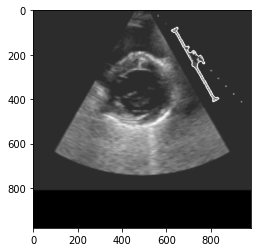

  1%|▋                                                                                 | 1/116 [00:00<00:37,  3.07it/s]

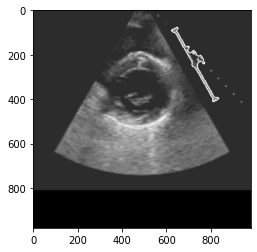

  2%|█▍                                                                                | 2/116 [00:00<00:36,  3.13it/s]

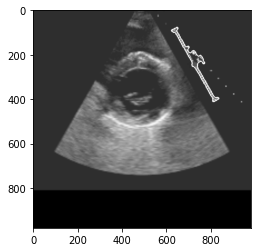

  3%|██                                                                                | 3/116 [00:00<00:36,  3.14it/s]

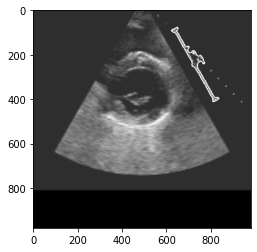

  3%|██▊                                                                               | 4/116 [00:01<00:35,  3.15it/s]

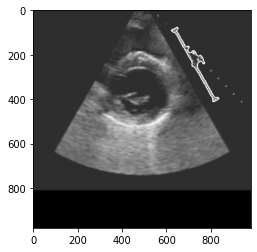

  4%|███▌                                                                              | 5/116 [00:01<00:35,  3.16it/s]

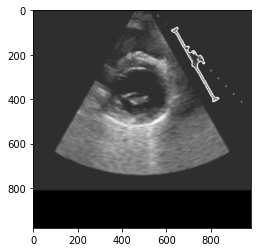

  5%|████▏                                                                             | 6/116 [00:01<00:34,  3.16it/s]

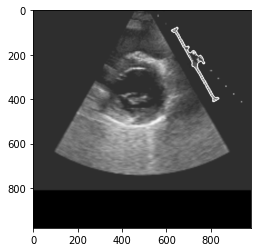

  6%|████▉                                                                             | 7/116 [00:02<00:34,  3.16it/s]

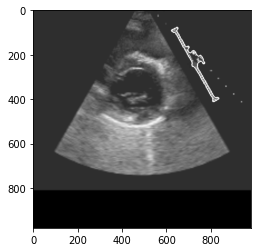

  7%|█████▋                                                                            | 8/116 [00:02<00:34,  3.15it/s]

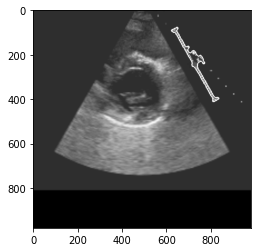

  8%|██████▎                                                                           | 9/116 [00:02<00:34,  3.11it/s]

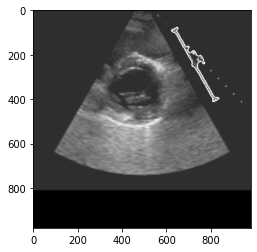

  9%|██████▉                                                                          | 10/116 [00:03<00:33,  3.12it/s]

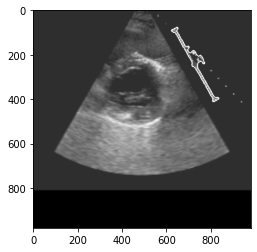

  9%|███████▋                                                                         | 11/116 [00:03<00:34,  3.07it/s]

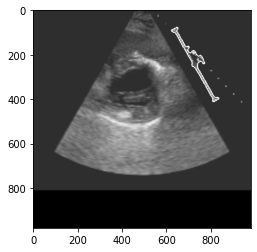

 10%|████████▍                                                                        | 12/116 [00:03<00:33,  3.07it/s]

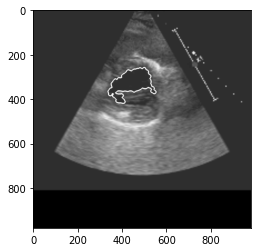

 11%|█████████                                                                        | 13/116 [00:04<00:33,  3.08it/s]

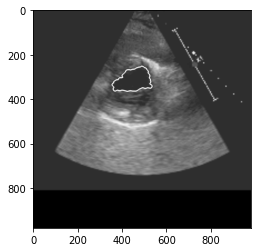

 12%|█████████▊                                                                       | 14/116 [00:04<00:39,  2.57it/s]

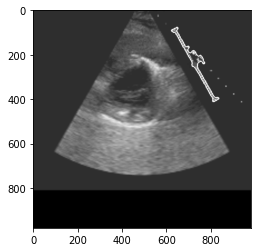

 13%|██████████▍                                                                      | 15/116 [00:05<00:37,  2.72it/s]

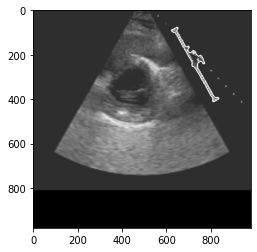

 14%|███████████▏                                                                     | 16/116 [00:05<00:35,  2.84it/s]

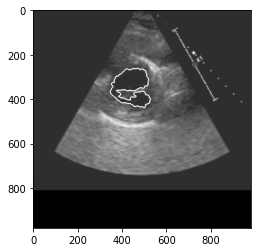

 15%|███████████▊                                                                     | 17/116 [00:05<00:33,  2.93it/s]

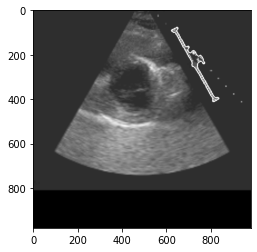

 16%|████████████▌                                                                    | 18/116 [00:05<00:32,  2.99it/s]

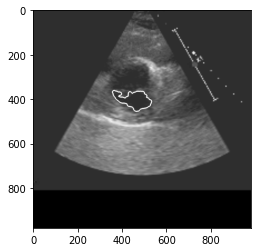

 16%|█████████████▎                                                                   | 19/116 [00:06<00:32,  3.03it/s]

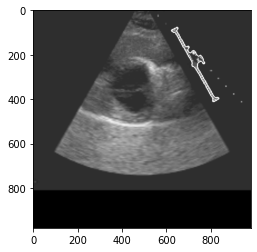

 17%|█████████████▉                                                                   | 20/116 [00:06<00:31,  3.04it/s]

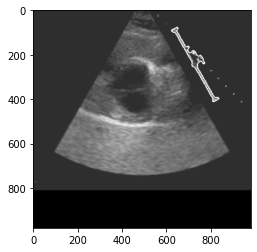

 18%|██████████████▋                                                                  | 21/116 [00:06<00:30,  3.08it/s]

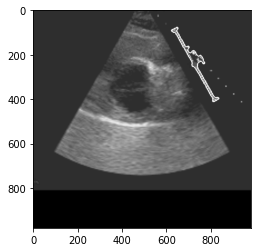

 19%|███████████████▎                                                                 | 22/116 [00:07<00:30,  3.10it/s]

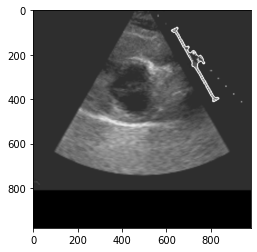

 20%|████████████████                                                                 | 23/116 [00:07<00:29,  3.12it/s]

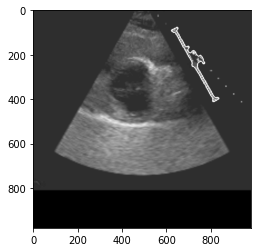

 21%|████████████████▊                                                                | 24/116 [00:07<00:29,  3.13it/s]

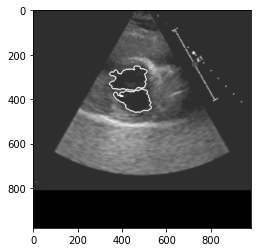

 22%|█████████████████▍                                                               | 25/116 [00:08<00:28,  3.14it/s]

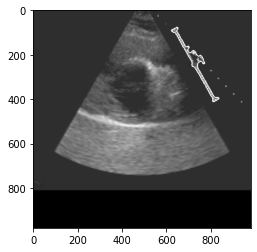

 22%|██████████████████▏                                                              | 26/116 [00:08<00:28,  3.13it/s]

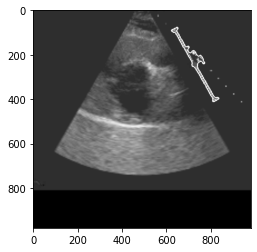

 23%|██████████████████▊                                                              | 27/116 [00:08<00:28,  3.13it/s]

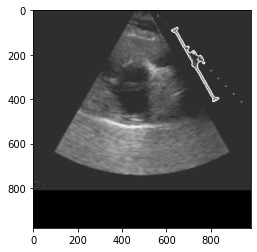

 24%|███████████████████▌                                                             | 28/116 [00:09<00:28,  3.12it/s]

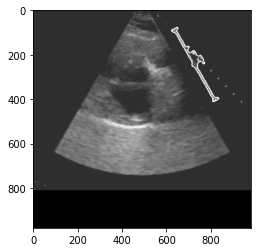

 25%|████████████████████▎                                                            | 29/116 [00:09<00:27,  3.11it/s]

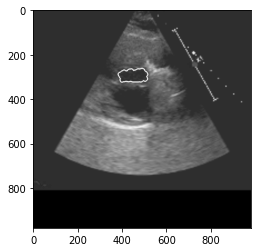

 26%|████████████████████▉                                                            | 30/116 [00:09<00:27,  3.13it/s]

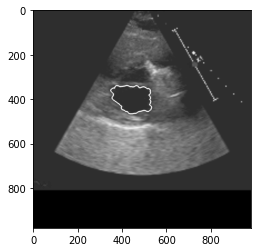

 27%|█████████████████████▋                                                           | 31/116 [00:10<00:27,  3.13it/s]

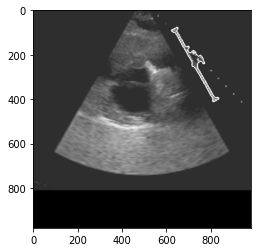

 28%|██████████████████████▎                                                          | 32/116 [00:10<00:26,  3.14it/s]

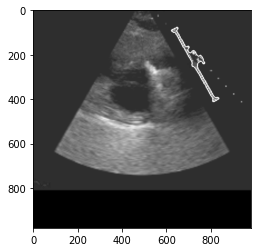

 28%|███████████████████████                                                          | 33/116 [00:10<00:26,  3.14it/s]

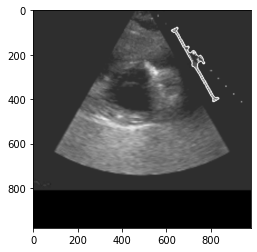

 29%|███████████████████████▋                                                         | 34/116 [00:11<00:26,  3.14it/s]

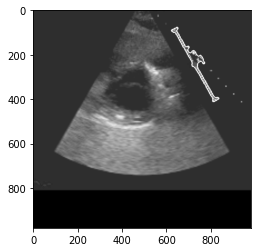

 30%|████████████████████████▍                                                        | 35/116 [00:11<00:25,  3.14it/s]

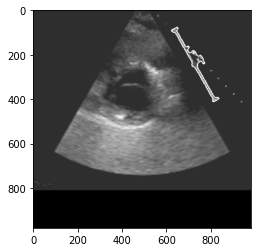

 31%|█████████████████████████▏                                                       | 36/116 [00:11<00:25,  3.14it/s]

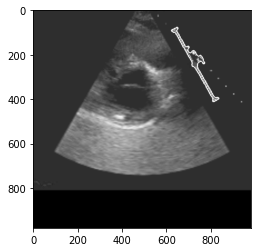

 32%|█████████████████████████▊                                                       | 37/116 [00:12<00:25,  3.14it/s]

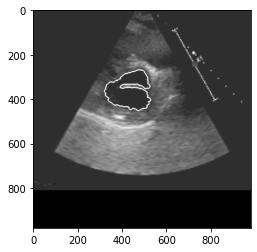

 33%|██████████████████████████▌                                                      | 38/116 [00:12<00:28,  2.78it/s]

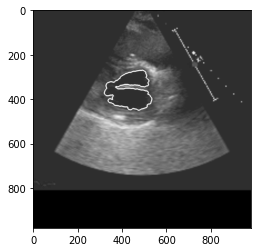

 34%|███████████████████████████▏                                                     | 39/116 [00:12<00:26,  2.86it/s]

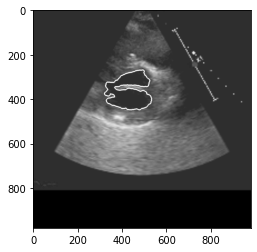

 34%|███████████████████████████▉                                                     | 40/116 [00:13<00:26,  2.88it/s]

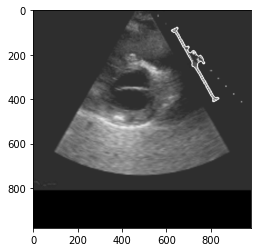

 35%|████████████████████████████▋                                                    | 41/116 [00:13<00:25,  2.96it/s]

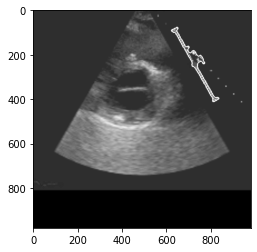

 36%|█████████████████████████████▎                                                   | 42/116 [00:13<00:24,  2.99it/s]

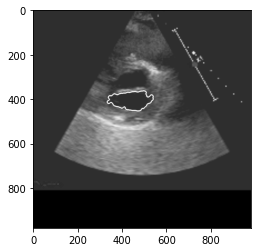

 37%|██████████████████████████████                                                   | 43/116 [00:14<00:24,  2.99it/s]

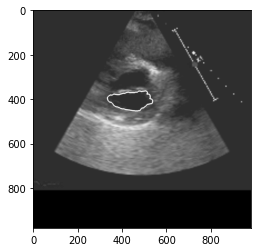

 38%|██████████████████████████████▋                                                  | 44/116 [00:14<00:23,  3.01it/s]

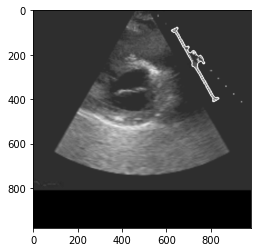

 39%|███████████████████████████████▍                                                 | 45/116 [00:14<00:23,  3.01it/s]

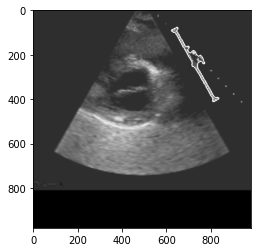

 40%|████████████████████████████████                                                 | 46/116 [00:15<00:22,  3.06it/s]

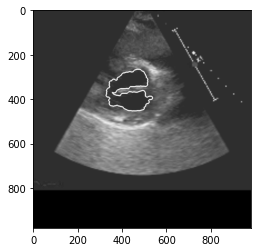

 41%|████████████████████████████████▊                                                | 47/116 [00:15<00:22,  3.05it/s]

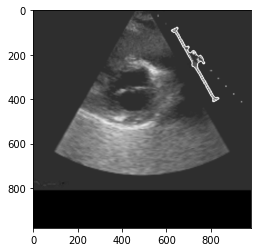

 41%|█████████████████████████████████▌                                               | 48/116 [00:15<00:22,  3.08it/s]

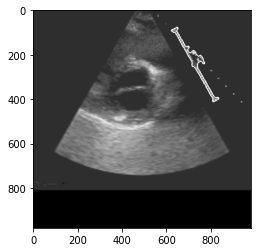

 42%|██████████████████████████████████▏                                              | 49/116 [00:16<00:21,  3.09it/s]

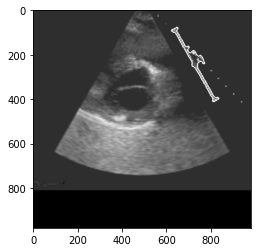

 43%|██████████████████████████████████▉                                              | 50/116 [00:16<00:21,  3.11it/s]

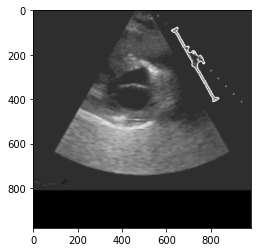

 44%|███████████████████████████████████▌                                             | 51/116 [00:16<00:20,  3.12it/s]

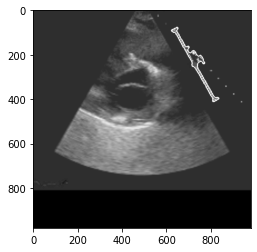

 45%|████████████████████████████████████▎                                            | 52/116 [00:17<00:20,  3.12it/s]

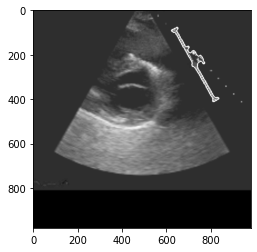

 46%|█████████████████████████████████████                                            | 53/116 [00:17<00:20,  3.12it/s]

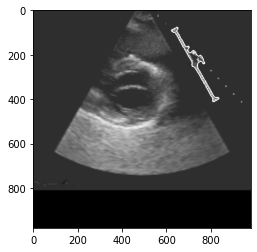

 47%|█████████████████████████████████████▋                                           | 54/116 [00:17<00:19,  3.12it/s]

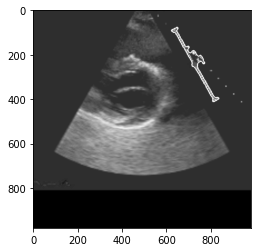

 47%|██████████████████████████████████████▍                                          | 55/116 [00:17<00:19,  3.12it/s]

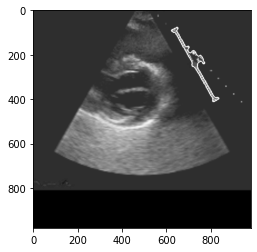

 48%|███████████████████████████████████████                                          | 56/116 [00:18<00:19,  3.10it/s]

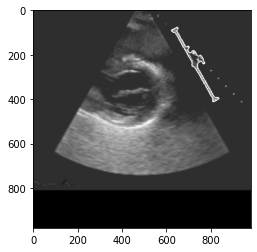

 49%|███████████████████████████████████████▊                                         | 57/116 [00:18<00:18,  3.12it/s]

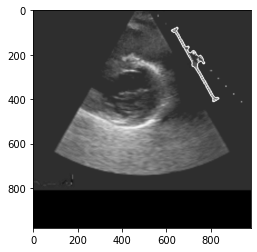

 50%|████████████████████████████████████████▌                                        | 58/116 [00:18<00:18,  3.13it/s]

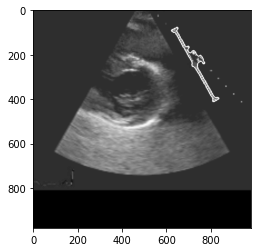

 51%|█████████████████████████████████████████▏                                       | 59/116 [00:19<00:18,  3.13it/s]

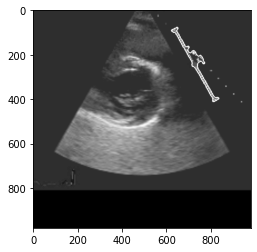

 52%|█████████████████████████████████████████▉                                       | 60/116 [00:19<00:17,  3.13it/s]

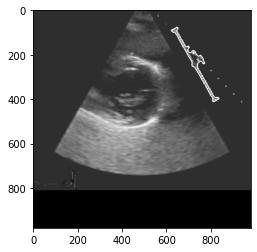

 53%|██████████████████████████████████████████▌                                      | 61/116 [00:20<00:20,  2.75it/s]

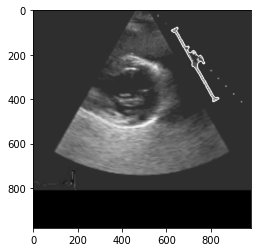

 53%|███████████████████████████████████████████▎                                     | 62/116 [00:20<00:18,  2.85it/s]

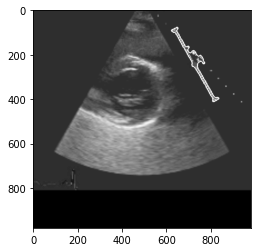

 54%|███████████████████████████████████████████▉                                     | 63/116 [00:20<00:18,  2.92it/s]

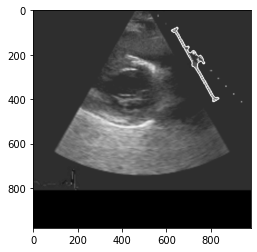

 55%|████████████████████████████████████████████▋                                    | 64/116 [00:21<00:17,  2.99it/s]

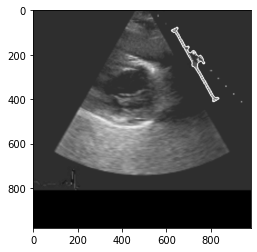

 56%|█████████████████████████████████████████████▍                                   | 65/116 [00:21<00:16,  3.03it/s]

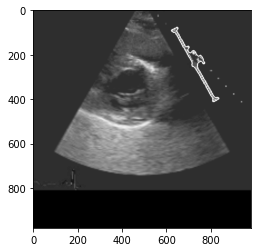

 57%|██████████████████████████████████████████████                                   | 66/116 [00:21<00:16,  3.06it/s]

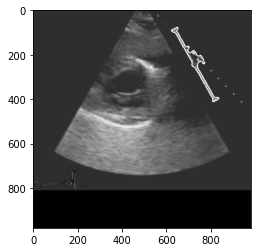

 58%|██████████████████████████████████████████████▊                                  | 67/116 [00:21<00:15,  3.09it/s]

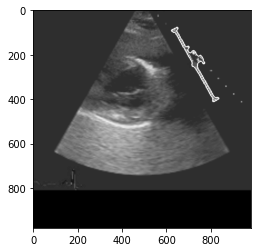

 59%|███████████████████████████████████████████████▍                                 | 68/116 [00:22<00:15,  3.10it/s]

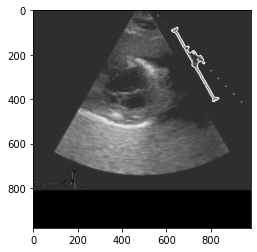

 59%|████████████████████████████████████████████████▏                                | 69/116 [00:22<00:15,  3.10it/s]

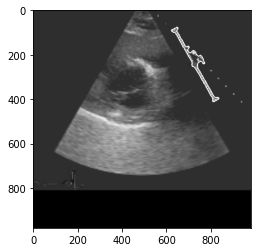

 60%|████████████████████████████████████████████████▉                                | 70/116 [00:22<00:14,  3.10it/s]

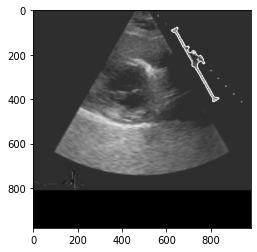

 61%|█████████████████████████████████████████████████▌                               | 71/116 [00:23<00:14,  3.11it/s]

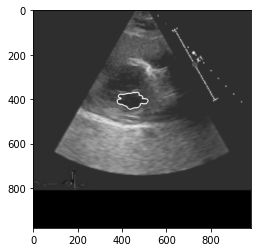

 62%|██████████████████████████████████████████████████▎                              | 72/116 [00:23<00:14,  3.11it/s]

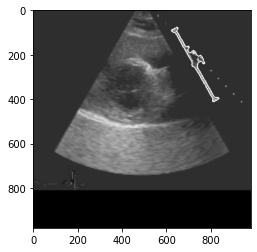

 63%|██████████████████████████████████████████████████▉                              | 73/116 [00:23<00:13,  3.11it/s]

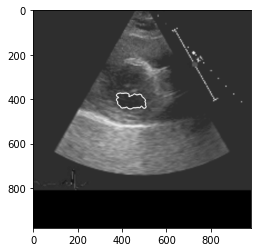

 64%|███████████████████████████████████████████████████▋                             | 74/116 [00:24<00:13,  3.12it/s]

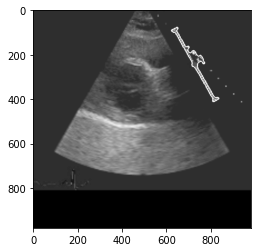

 65%|████████████████████████████████████████████████████▎                            | 75/116 [00:24<00:13,  3.13it/s]

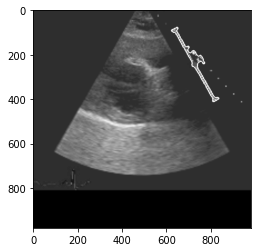

 66%|█████████████████████████████████████████████████████                            | 76/116 [00:24<00:12,  3.13it/s]

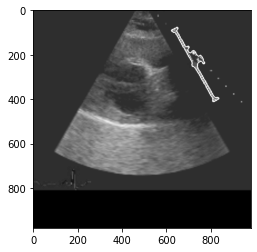

 66%|█████████████████████████████████████████████████████▊                           | 77/116 [00:25<00:12,  3.13it/s]

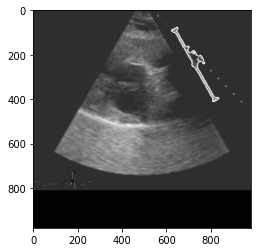

 67%|██████████████████████████████████████████████████████▍                          | 78/116 [00:25<00:12,  3.13it/s]

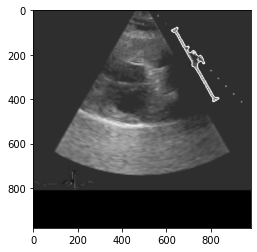

 68%|███████████████████████████████████████████████████████▏                         | 79/116 [00:25<00:11,  3.14it/s]

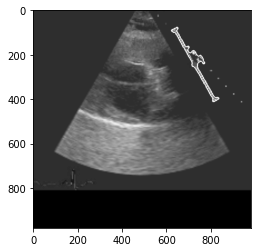

 69%|███████████████████████████████████████████████████████▊                         | 80/116 [00:26<00:11,  3.14it/s]

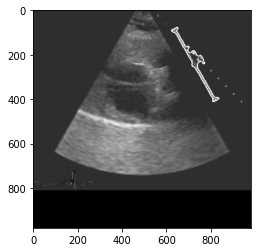

 70%|████████████████████████████████████████████████████████▌                        | 81/116 [00:26<00:11,  3.14it/s]

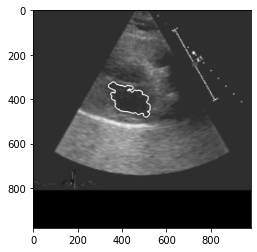

 71%|█████████████████████████████████████████████████████████▎                       | 82/116 [00:26<00:10,  3.15it/s]

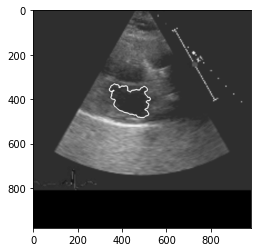

 72%|█████████████████████████████████████████████████████████▉                       | 83/116 [00:27<00:10,  3.16it/s]

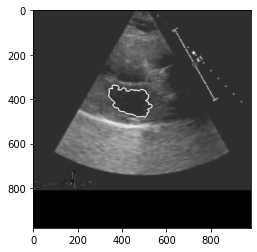

 72%|██████████████████████████████████████████████████████████▋                      | 84/116 [00:27<00:11,  2.78it/s]

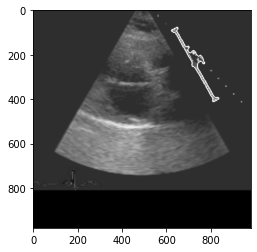

 73%|███████████████████████████████████████████████████████████▎                     | 85/116 [00:27<00:10,  2.87it/s]

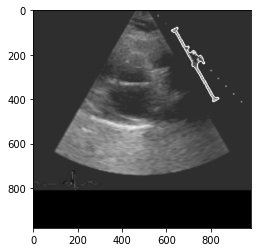

 74%|████████████████████████████████████████████████████████████                     | 86/116 [00:28<00:10,  2.96it/s]

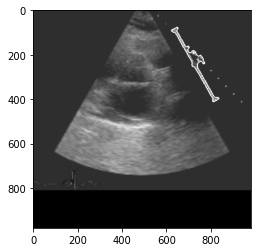

 75%|████████████████████████████████████████████████████████████▊                    | 87/116 [00:28<00:09,  3.01it/s]

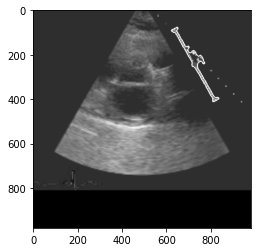

 76%|█████████████████████████████████████████████████████████████▍                   | 88/116 [00:28<00:09,  3.06it/s]

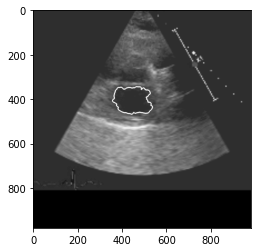

 77%|██████████████████████████████████████████████████████████████▏                  | 89/116 [00:29<00:08,  3.09it/s]

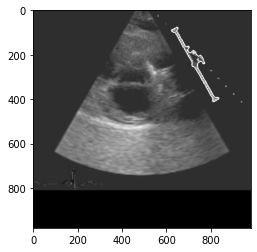

 78%|██████████████████████████████████████████████████████████████▊                  | 90/116 [00:29<00:08,  3.09it/s]

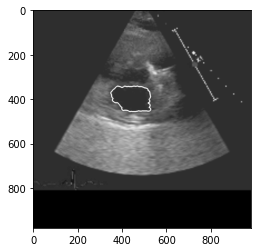

 78%|███████████████████████████████████████████████████████████████▌                 | 91/116 [00:29<00:08,  3.10it/s]

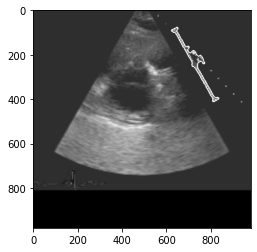

 79%|████████████████████████████████████████████████████████████████▏                | 92/116 [00:30<00:07,  3.11it/s]

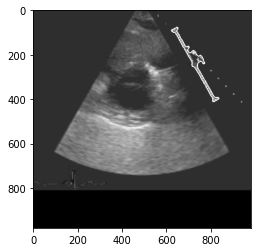

 80%|████████████████████████████████████████████████████████████████▉                | 93/116 [00:30<00:07,  3.13it/s]

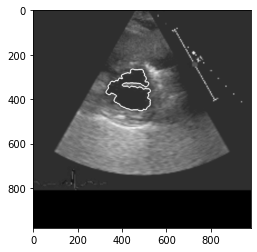

 81%|█████████████████████████████████████████████████████████████████▋               | 94/116 [00:30<00:07,  3.12it/s]

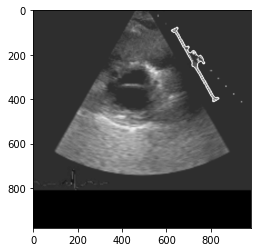

 82%|██████████████████████████████████████████████████████████████████▎              | 95/116 [00:31<00:06,  3.13it/s]

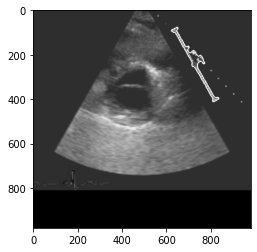

 83%|███████████████████████████████████████████████████████████████████              | 96/116 [00:31<00:06,  3.14it/s]

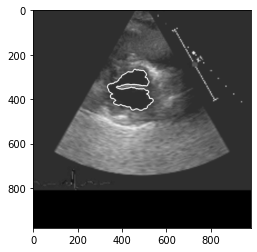

 84%|███████████████████████████████████████████████████████████████████▋             | 97/116 [00:31<00:06,  3.15it/s]

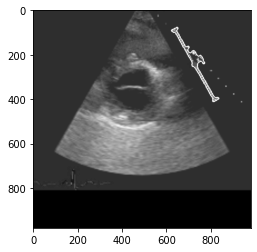

 84%|████████████████████████████████████████████████████████████████████▍            | 98/116 [00:31<00:05,  3.15it/s]

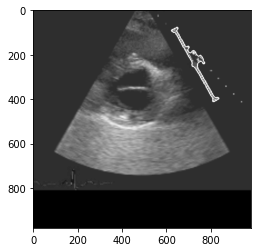

 85%|█████████████████████████████████████████████████████████████████████▏           | 99/116 [00:32<00:05,  3.15it/s]

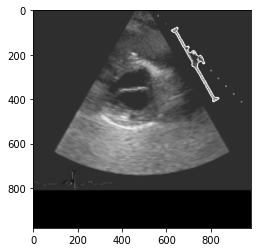

 86%|████████████████████████████████████████████████████████████████████▉           | 100/116 [00:32<00:05,  3.16it/s]

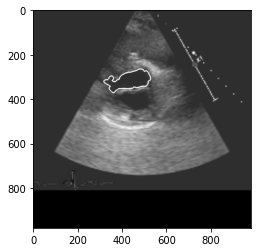

 87%|█████████████████████████████████████████████████████████████████████▋          | 101/116 [00:32<00:04,  3.16it/s]

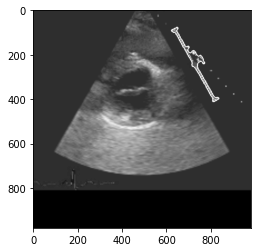

 88%|██████████████████████████████████████████████████████████████████████▎         | 102/116 [00:33<00:04,  3.16it/s]

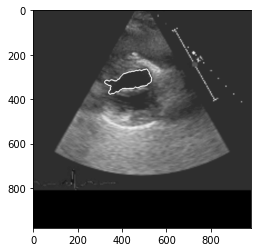

 89%|███████████████████████████████████████████████████████████████████████         | 103/116 [00:33<00:04,  3.16it/s]

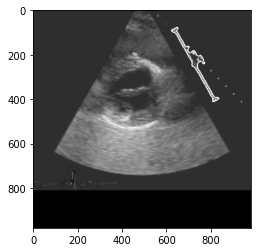

 90%|███████████████████████████████████████████████████████████████████████▋        | 104/116 [00:33<00:03,  3.16it/s]

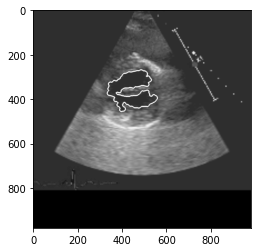

 91%|████████████████████████████████████████████████████████████████████████▍       | 105/116 [00:34<00:03,  3.15it/s]

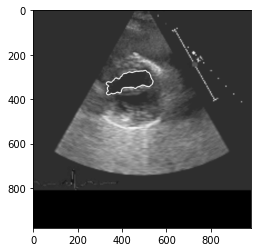

 91%|█████████████████████████████████████████████████████████████████████████       | 106/116 [00:34<00:03,  3.15it/s]

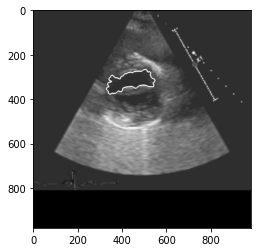

 92%|█████████████████████████████████████████████████████████████████████████▊      | 107/116 [00:34<00:03,  2.79it/s]

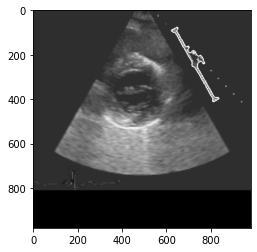

 93%|██████████████████████████████████████████████████████████████████████████▍     | 108/116 [00:35<00:02,  2.88it/s]

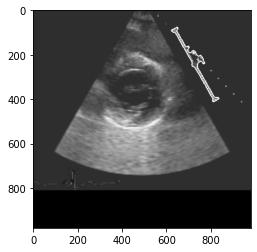

 94%|███████████████████████████████████████████████████████████████████████████▏    | 109/116 [00:35<00:02,  2.95it/s]

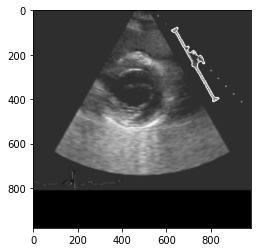

 95%|███████████████████████████████████████████████████████████████████████████▊    | 110/116 [00:35<00:01,  3.02it/s]

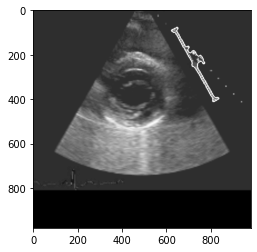

 96%|████████████████████████████████████████████████████████████████████████████▌   | 111/116 [00:36<00:01,  3.06it/s]

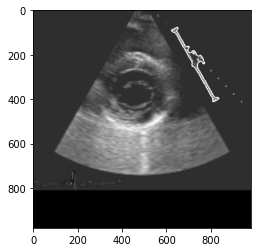

 97%|█████████████████████████████████████████████████████████████████████████████▏  | 112/116 [00:36<00:01,  3.09it/s]

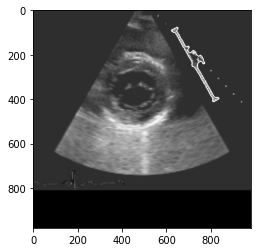

 97%|█████████████████████████████████████████████████████████████████████████████▉  | 113/116 [00:36<00:00,  3.11it/s]

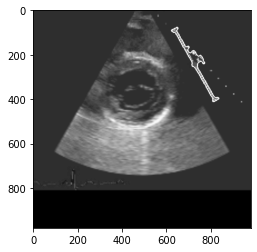

 98%|██████████████████████████████████████████████████████████████████████████████▌ | 114/116 [00:37<00:00,  3.13it/s]

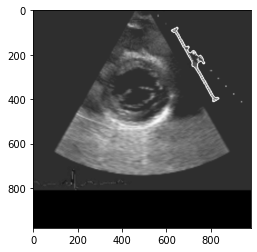

 99%|███████████████████████████████████████████████████████████████████████████████▎| 115/116 [00:37<00:00,  3.14it/s]

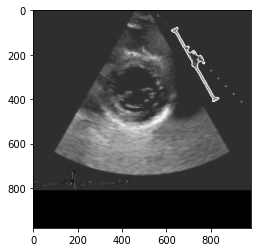

100%|████████████████████████████████████████████████████████████████████████████████| 116/116 [00:37<00:00,  3.07it/s]


In [12]:
centroids = [centroid(ctr)]
areas = [poly_area(ctr)]
ctrs = [ctr]
ims = []
for i in tqdm(range(1, img.shape[0])):
    im = morphic(img[i])
    contours = get_borders(im)
    temp_cntrds = []
    temp_areas = []
    dists = []
    scores = 
    
    for j in range(len(contours)):
        contr = contours[j][:,0]
        new_center = centroid(contr)
        
        dist = euclidean(centroids[-1], new_center)
        dists.append(dist)
        temp_cntrds.append(new_center)
        area = poly_area(contr)
        err = error(area, areas[-1])
        temp_areas.append(err)
        
    
    indx = temp_areas.index(min(temp_areas))
    
    centroids.append(temp_cntrds[indx])
    ctrs.append(contours[indx][:,0])
    n_img = img[i].copy()
    draw_contour(n_img, ctrs[i])
    ims.append(n_img)
    # break
    
        
        

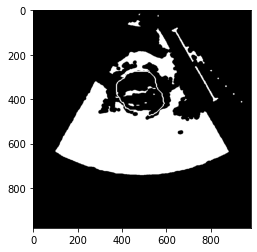

In [12]:
draw_contour(im, ctrs[i])

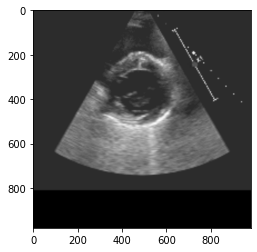

In [258]:
plt.imshow(img[1])

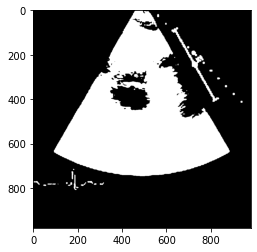

In [197]:
n = np.random.randint(0, img.shape[0]-1)
src = cv2.GaussianBlur(img[n], (3, 3), 0).astype(np.uint8)
(thresh, bw_img) = cv2.threshold(src, 53, 255, cv2.THRESH_BINARY)
plt.imshow(bw_img)

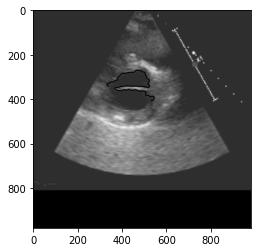

In [27]:
plt.imshow(ims[40])

In [15]:
result = cv2.VideoWriter('output_video_from_file.avi', cv2.VideoWriter_fourcc('M','J','P','G'), 20, ims[0].shape)

for i in range(len(ims)):
    result.write(ims[i])
    cv2.imshow('frame', ims[i])
    _= cv2.waitkey(20)
result.release()

AttributeError: module 'cv2' has no attribute 'waitkey'

In [11]:
ims[0].shape

(980, 980)